
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">



# <center> **01. Fundamentals of Machine Learning: towards gradient descent** </center>



## **Outline**

1. [**Machine Learning "re"-introduction**](#machine_learning)
2. [**Regression from scratch: a linear approximation**](#regression)




In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA2-20223-H1" #@param {type:"string"}
assignment_id = group_id +'.dl_fundamentals'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [1]:
#@title **Student:** Mount the Drive  (If you are in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/UIS/Courses/2020-UIS-MachineAnsDeepLearning/ai-2-uis-student')

print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1NGefTk7hA8tb7ARun-C3IwOn2dGOcicJ/ai-2-uis-student


# 1. **Machine Learning** <a name="machine_learning"></a>

How to go from here (sci-fi) to here (fundamentals on IA) **without lost motivation**?


<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/img1.png" width="700"></center>

##  "A computer learns from experience **E** (training data) with respect to some task **T** (classification/regression) and some performance measure **P** (accuracy, RoC), if its performance on **T**, as measured by **P**, improves with experience **E**."  *(Modified from: Mitchell, 1998)*


# **Supervised Learning**

The idea is to adjust a  function from **labeled training data** and try to associate a **label** (predict/estimate/reconstruct/measure) to a new data.

<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/img2.png" width="700"></center>

Formally, we have input variables ($x$) and an output variable ($y$) and we will use/develop/modify/propose an algorithm to learn the mapping function from the input to the output.

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

**We will see with an example:**


- Load (with Pandas) the dataset [**Boston Housing Dataset**](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset)  [**CSV Location:**](https://github.com/selva86/datasets/blob/master/BostonHousing.csv) *Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.*

- What is this **dataset** about?

- ```print``` the **keys** that the dataset gives,. What does they mean?

- We want to predict **Median value of owner-occupied homes in $1000** variable from  **Percentage of lower status of the population** variable. What would you do?🙂
 - What about if we use the **Crime rate by town per capita**. Is it worth it?

In [2]:
#@title **Student code for the solution**
# wirte code Here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/ACADEMIA/Courses/_IA2/repos/ai-2-uis-student/data/BostonHousing.csv")

df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

<Axes: xlabel='lstat'>

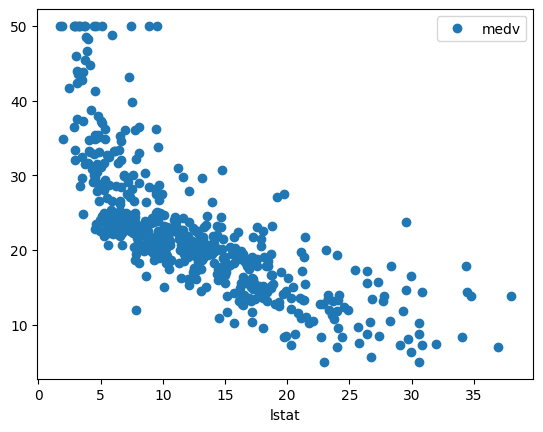

In [4]:
df.plot(x='lstat',y='medv',style='o')

In [7]:
df[['lstat','medv']]

lstat  medv
0     4.98  24.0
1     9.14  21.6
2     4.03  34.7
3     2.94  33.4
4     5.33  36.2
..     ...   ...
501   9.67  22.4
502   9.08  20.6
503   5.64  23.9
504   6.48  22.0
505   7.88  11.9

[506 rows x 2 columns]

The idea is then **estimate** the **MEDV** value (which is a real value) from the **LSTAT**. This is named **REGRESSION!** 😲

# **2. Regression from scratch: a linear approximation** <a name="regression"></a>

- In this supervised problem, it should be predicted a **continuous value** based on a set of **training data**.
- Then, we need to fit a function $f(x)$ to represent the regresion from training data $\mathbf{X}$
  - **Fit** means find the **best parameters** that adjust the function $f(x) = \{\omega_1, \omega_2, \ldots, \omega_n\}$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- Which is the **simplest** function to fit training data ?
- Which are the parameters for the **simplest** function ?
- In our particular case, which input/output variables ?
- How many trainig values ($\mathbf{X}$) we have?





In [8]:
#@title **Student code for the solution**
# wirte code Here

X = df['lstat'].copy()
Y = df['medv'].copy()

Text(0.5, 0, 'Lower status population (%)')

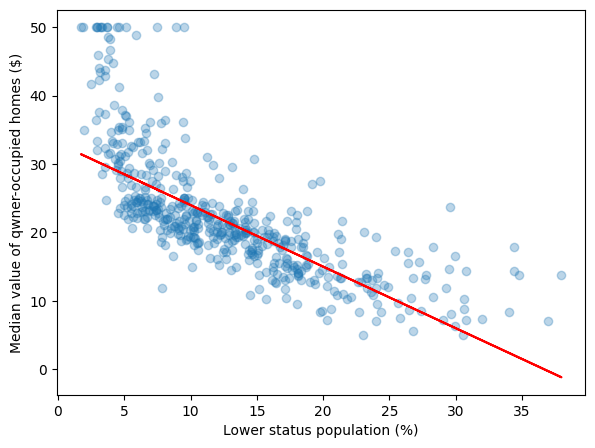

In [9]:
#@title  **How do we define the best parameters?**

w_0 = 33 #@param {type:"number"}
w_1 = -0.9#@param {type:"number"}

y_est = w_0 + w_1 * X

fig = plt.figure(figsize=(15,5))
# Set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
# Plot a scatters points

ax.scatter(X, Y, alpha=0.3)
ax.plot(X , y_est, c="red")
ax.set_ylabel('Median value of qwner-occupied homes ($)')
ax.set_xlabel('Lower status population (%)')

# **2. Regression as linear regression**

How do we define the **best** parameters ?


  - We have available $n$ **training** samples, where each $i$ sample is a tuple: $(x^{i}, y^{i})$
  - We need to evaluate the function $f_{\omega}(x) = \{\omega_0,\omega_1, \ldots \}$ that minimize **the error**, so....

  - **THE HIPOTHESIS:** we assume that regression could be represented by $f_{\omega}(x) = \omega_0 +\omega_1 x$.
  
    **Actually** it could  be represented as a neural graph
    <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/dl1.jpg" >

    **There is** a relationship with **biological** neurons
    <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/singleN.png" >


  - The parameters to **LEARN** are $\{\omega_0,\omega_1\}$

  - The cost function is the error $ J(\omega) = \mathbf{e}(Y_{\omega}(x) - \mathbf{Y})$

  - ###### **The GOAL is TO MINIMIZE ($J(\omega)$): $\underset{\omega_0, \omega_1}{min} (E)$**  


#### **Least squares**

<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/mse_grafica.png" width="300"></center>



Then, the goal is to define an error function $J(\omega)$ that can be expressed mathematically as  the **mean square error (MSE)**  as: $J(\omega) = \frac{1}{n}\sum_{i}^{n}( \underset{\mathbf{e}}{\underbrace{y^{i} -\hat{y}_{\omega}(x^{i})}} )^{2}$, matricially:

 $$J(\omega) = \frac{1}{n}\mathbf{e}^{T}\mathbf{e}$$

where $\hat{y}_{\omega}(x^{i})$ is prediction on $x^{i}$ point with parameters $\omega$ and the  $y^{i}$ the corresponding training value ($x^{i}, y^{i} $) and the linear model is: $\hat{y}_{\omega}(x^{i}) = \omega_0 + \omega_1 x^{i}$. The simplest way to solve this problem come  from **closed solutions**. From matricial notation, the cost function, can be defined as:
$$
\begin{matrix}
 J(\omega)  = &\frac{1}{n}(Y-XW)^T (Y-XW)\\
            = &\frac{1}{n}(Y^T-W^{T}X^{T}) (Y-XW)\\
            = &\frac{1}{n}(Y^T Y - Y^T XW - W^T X^T Y + W^T X^T XW)\\
            = &\frac{1}{n}(Y^T Y - 2 W^T X^T Y + W^T X^T XW) **
\end{matrix}
$$

** $Y^T XW = W^T X^T Y $ because is a matrix $1 \times 1$

Now, we can derivate $J(\omega)$ w.r.t $\omega$, as

$$
\begin{matrix}
 \nabla J(\omega) & = \frac{1}{n}(\nabla Y^T Y - 2 \nabla W^T X^T Y + \nabla W^T X^T XW)\\
                 & = \frac{1}{n}(0 - 2 X^T Y + 2 X^T XW) *** \\
                 & = \frac{2}{n}(\underbrace{ X^T XW- X^T Y }) \\
\end{matrix}
$$

[*** Rule to derivate tranpose](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf). To find optimum $W$, the equation $X^T XW- X^T Y =0$. Solving,

 $$\hat{W} = (X^TX)^{-1} X^T Y$$

**Make predictions:** $\hat{Y} = X\hat{W}$

<br><br>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Now, you can the opportunity to implement this **close solution** for the dataset [**The Boston Housing Dataset**](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

- $(\mathbf{\hat{Y}})$ is the Median value of owner-occupied homes in $\$1000s$
- $(\mathbf{\hat{X}})$ is the Percentage of lower status population

**To do:** Load dataset, show in a header and get $(\mathbf{X}, \mathbf{Y})$




In [ ]:
#@title Getting into the Boston housing dataframe
# Select variable of interest
X = boston_dataset['lstat'].values
# Select variable to predict
Y = boston_dataset['medv'].values

print("X: ", X.shape, "Y: ", Y.shape)
print(boston_dataset.shape)
boston_dataset.head()

X:  (506,) Y:  (506,)
(506, 14)


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

Text(0.5, 17.200000000000003, 'Lower status population (%)')

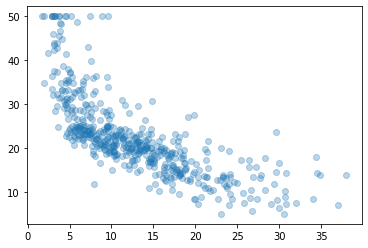

In [ ]:
#@title Show a graphic between them
plt.scatter(X,Y, alpha = 0.3);
ax.set_ylabel('Median value of qwner-occupied homes ($)')
ax.set_xlabel('Lower status population (%)')

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Arrange $\mathbf{X}$ by adding a ones column ($x_0$) that support $\omega_0$ operation

In [11]:
#@title **Student code for the solution**
# wirte code Here
X_new = np.ones((X.shape[0],2))

X_new[:,1] = X


In [13]:
X_new

array([[1.  , 4.98],
       [1.  , 9.14],
       [1.  , 4.03],
       ...,
       [1.  , 5.64],
       [1.  , 6.48],
       [1.  , 7.88]])

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Compute $W = (X^TX)^{-1} X^T Y$ using matricial numpy operations

In [ ]:
#@title **Student code for the solution**
# wirte code Here
"""
Please write your code here
"""

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Compute $\hat{Y} = XW$

In [ ]:
#@title **Student code for the solution**
# wirte code Here
"""
Please write your code here
"""

Text(0.5, 0, 'Lower status population (%)')

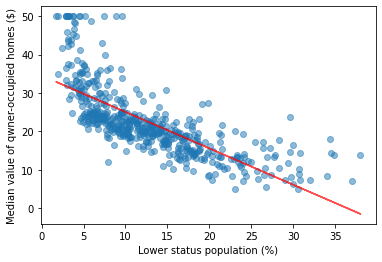

In [ ]:
#@title Show the **closed solution** in a plot
plt.scatter(X_ad[:,1],Y, alpha=0.5);
plt.plot(X_ad[:,1],predictedY, 'red', alpha=0.7);
plt.ylabel('Median value of qwner-occupied homes ($)')
plt.xlabel('Lower status population (%)')

**In summary**, linear regression assumes between a dependent variable ($y$) and independent variables ($x$) for a single input variable ($x_1$). In comparison, for multiple input variables is a  **multiple linear regression** (until $x_i$), described as:

$$y = \omega_0 + \omega_1 x_1 + \dots + \omega_i x_i + \epsilon$$

Where  $\omega_1$ is scale factor and $\omega_0$  indicates the intercept. Also, the $\epsilon$ parameter indicates the error (namely assumed as Gaussian distribution $(G(\mu=0, \sigma=1)$). The following graphs show the relationship of temperature to pressure and rainfall accumulated in Beijing.

/usr/local/lib/python3.8/dist-packages/IPython/utils/py3compat.py:188: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(compiler(f.read(), fname, 'exec'), glob, loc)


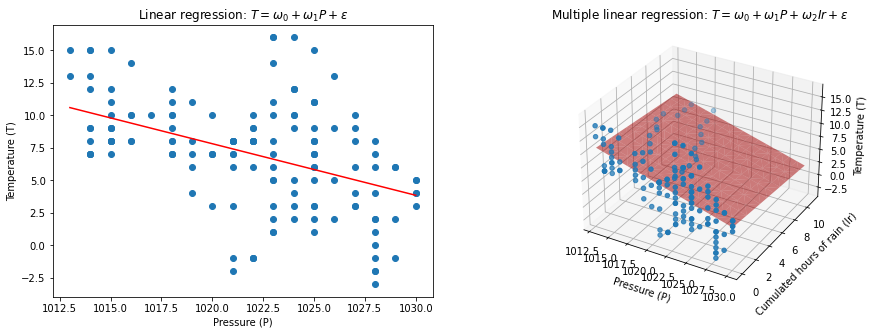

<Figure size 432x288 with 0 Axes>

In [ ]:
#@title **Linear regression plots** { display-mode: "form" }
%run -i 'code/plot_class_1_1.py'

# **Some partial Conclusions!**
This type of solution has strong limitations such as:
* High complexity in environments with large amounts of observations.
* Restrictions on the calculation of the inverse matrix (singularity)

***What happens when it is not possible to solve the problem with closed formulation?***

# **References**

[1. Introduction to Deep Learning From Logical Calculus to Artificial Intelligence](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/bib/student_2016_Book_IntroductionToStatisticsAndDat.pdf)

[2. Introduction to Data Science A Python Approach to Concepts, Techniques and Applications ](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/bib/student_2017_Book_IntroductionToDataScience.pdf)



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">